# Basic Finance Skills Exercises

### week 2-1

* NPV calculation example
* IRR calculation example
* Bond pricing curve example

In this note, we learn how to implement bond pricing theories into python codes. This will serve as a building block for future project of predicting 
exchange rates.


> *Note 1. source code, exmaples and data: KAIST Business school, Prof. Jaehoon Lee*\
> *Note 2. The concpets covered here are from first year undergraduate finance course, so concepts themselves are not explained in details here.*

## **1. NPV Calculation**

Example case:

* Face value: $ 1,000
* Maturity: 5 year
* Coupon rate: 5 % per annum
* Coupon frequency: annual
* Discount rate: 2 % (constant)

Calculate NPV of this bond.

$$
\text{NPV} = \sum_{t = 1}^T \frac{\text{CF}_t}{(1 + r)^t}
$$

In [1]:
#face value
face = 1000

#maturity
T = 5

#coupon rate
c = 0.05

#discount rate
r = 0.02

#### **Method 1.**

In [2]:
NPV = 0

#Add all present values of coupon payments (discounted interests)
for t in range(1, T+1):
    CF = face * c
    PV = CF / (1+r)**t
    print('t = {}, CF = {}, PV = {:.2f}'.format(t, CF, PV))
    #or
    #print(f't = {t}, CF = {CF}, PV = {PV:.2f}')
    NPV += PV

#Add the present value of principal (discounted principal)
NPV += face / (1+r)**T

print() #empty line

#display result rounded to 2 
print('NPV: {:.2f}'.format(NPV))

#or
#print(f'NPV: {NPV:.2f}')

t = 1, CF = 50.0, PV = 49.02
t = 2, CF = 50.0, PV = 48.06
t = 3, CF = 50.0, PV = 47.12
t = 4, CF = 50.0, PV = 46.19
t = 5, CF = 50.0, PV = 45.29

NPV: 1141.40


#### **Method 2. List comprehension** (specific to Python)

In [3]:
NPV = 0

PVs = [(face * c)/(1+r)**t for t in range(1, T + 1)]

#Add all present values of coupon payments (discounted interests)
NPV2 = sum(PVs)

#Add the present value of principal (discounted principal)
NPV2 += face / (1+r)**T

#display result rounded to 2 
print('NPV: {:.2f} '.format(NPV2))
#or
#print(f'NPV: {NPV2:.2f}')

NPV: 1141.40 


## **2. IRR Calculation**

Example case:

* Face value: $ 1,000
* Maturity: 5 year
* Coupon rate: 5 % per annum
* Coupon frequency: annual
* Observed Market price: \$ 1,130

Calculate IRR of this bond.

In [4]:
face = 1000
T = 5
c = 0.05
price = 1130

> Take market price as NPV\
> NPV is a function of r, f(r)\
> Find r instead using NPV numerically

#### **Step 1. Define a NPV function**

In [13]:
#step 1. Define a NPV function, f(r)

def compute_npv(r):
    PVs = [((face * c)/(1 + r) ** t) for t in range(1, T + 1)]
    npv = sum(PVs) + face / (1 + r) ** T

    return npv

In [15]:
#example: previous example
compute_npv(0.02)

1141.4037852551262

In [18]:
#step 2. Find a sufficiently small range where the IRR is supposed to be

for r in [0.02, 0.03, 0.05]:
    npv = compute_npv(r)
    print('NPV if r = {}: {:.2f}'.format(r, npv))
    #or
    #print(f'NPV if r = {r}: {npv:.2f}')

NPV if r = 0.02: 1141.40
NPV if r = 0.03: 1091.59
NPV if r = 0.05: 1000.00


> So, it can be seen that the optimal `r` lies in 0.02 and 0.03

#### **Step 2. Numerical solution (Optimization)**

In [20]:
from scipy import optimize

In [21]:
# error = market price - npv
# objective: find r such that error is zero

def error(r):
    return price - compute_npv(r)

In [22]:
# root_scalar: find a value in a bracket range (input) which makes the target(error) zero
# root: target is zero
# scalar: input is scalar
sol = optimize.root_scalar(error, bracket = [0.02, 0.03])

In [23]:
sol

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 0.022239858418338223
         method: brentq

In [24]:
print('IRR: {:.4f}'.format(sol.root * 100))

IRR: 2.2240


Alternatively, and preferrably, **Step 2.** can be done with a **lambda function**.

In [26]:
sol = optimize.root_scalar(lambda r : price - compute_npv(r), bracket = [0.02, 0.03])

In [27]:
print('IRR: {:.4f}'.format(sol.root * 100))

IRR: 2.2240


## **3. YTM and NPV graph**

* Face value: \$1,000
* Maturity: 5 years
* Coupon rate: 5\% p.a. (per annum)
* Coupon frequency: annual

Display the relationship between YTM and NPV in a single graph

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
min_ytm = 0
max_ytm = 0.10
steps = 100

In [30]:
incr = (max_ytm - min_ytm) / steps

In [31]:
# x-axis (IRR)
ytm = [min_ytm + x * incr for x in range(steps)]

In [33]:
# or alternatively
ytm2 = np.arange(min_ytm, max_ytm, incr)

In [34]:
# y-axis (NPV)
npv = [compute_npv(r) for r in ytm]

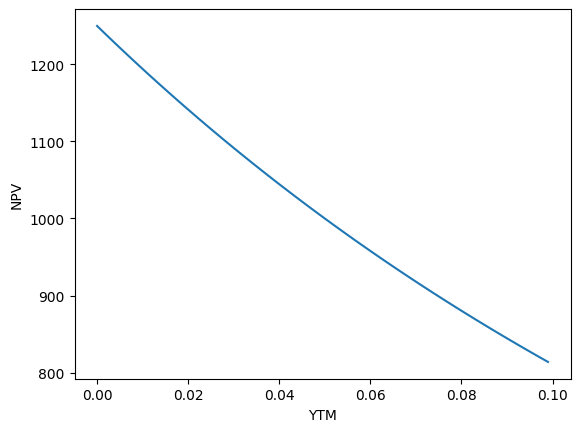

In [38]:
plt.plot(ytm, npv)
plt.xlabel('YTM')
plt.ylabel('NPV')
plt.show()

When YTM equals coupon rate, NPV = face value

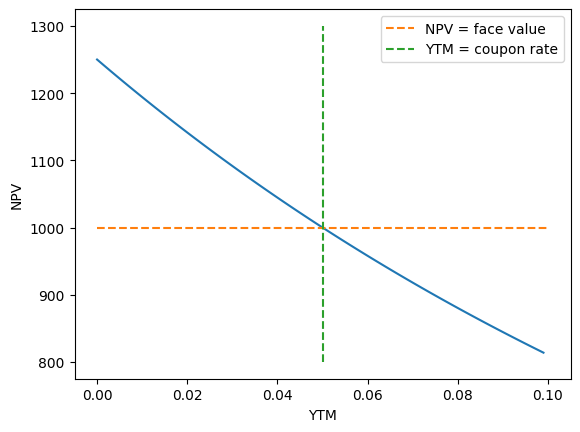

In [39]:
plt.plot(ytm, npv)


#auxiliary dashed line
plt.plot([0, 0.1], [1000, 1000], linestyle = 'dashed',
        label = 'NPV = face value')

plt.plot([0.05, 0.05], [800, 1300], linestyle = 'dashed',
        label = 'YTM = coupon rate')


plt.xlabel('YTM')
plt.ylabel('NPV')


plt.legend()
plt.show()